In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, fbeta_score, roc_curve, auc
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv('Employee.csv')

In [3]:
df.shape

(4653, 9)

In [ ]:
df.info()

In [ ]:
df.head(7)

In [ ]:
df.describe()

In [4]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df['EverBenched'] = df['EverBenched'].replace({'Yes': 1, 'No': 0})
#one hot encoding
df = pd.get_dummies(df, columns=['Education', 'City'], drop_first=False)

df.head()

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune
0,2017,3,34,1,0,0,0,True,False,False,True,False,False
1,2013,1,28,0,0,3,1,True,False,False,False,False,True
2,2014,3,38,0,0,2,0,True,False,False,False,True,False
3,2016,3,27,1,0,5,1,False,True,False,True,False,False
4,2017,3,24,1,1,2,1,False,True,False,False,False,True


In [5]:
# List of boolean columns to convert to integers
bool_columns = ['Education_Bachelors', 'Education_Masters', 'Education_PHD', 'City_Bangalore', 'City_New Delhi', 'City_Pune']

# Convert boolean columns to integers
df[bool_columns] = df[bool_columns].astype(int)

# Verify the conversion
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   JoiningYear                4653 non-null   int64
 1   PaymentTier                4653 non-null   int64
 2   Age                        4653 non-null   int64
 3   Gender                     4653 non-null   int64
 4   EverBenched                4653 non-null   int64
 5   ExperienceInCurrentDomain  4653 non-null   int64
 6   LeaveOrNot                 4653 non-null   int64
 7   Education_Bachelors        4653 non-null   int64
 8   Education_Masters          4653 non-null   int64
 9   Education_PHD              4653 non-null   int64
 10  City_Bangalore             4653 non-null   int64
 11  City_New Delhi             4653 non-null   int64
 12  City_Pune                  4653 non-null   int64
dtypes: int64(13)
memory usage: 472.7 KB
None


In [ ]:
df.duplicated().sum()

In [ ]:
df = df.drop_duplicates()
df.shape

In [ ]:
df.describe()

In [6]:
X = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:


# Initialize KFold with the desired number of folds (e.g., 5)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Lists to store performance metrics for each fold
train_scores = []
val_scores = []

for train_index, val_index in k_fold.split(X_train):
    X_kfold_train, X_kfold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_kfold_train, y_kfold_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Train the Logistic Regression model
    model.fit(X_kfold_train, y_kfold_train)
    
    # Predict on training and validation sets
    train_preds = model.predict(X_kfold_train)
    val_preds = model.predict(X_kfold_val)
    
    # Calculate and store the performance metrics (e.g., Accuracy)
    train_score = accuracy_score(y_kfold_train, train_preds)
    val_score = accuracy_score(y_kfold_val, val_preds)
    
    train_scores.append(train_score)
    val_scores.append(val_score)

# Evaluate the average performance across all folds
average_train_score = sum(train_scores) / len(train_scores)
average_val_score = sum(val_scores) / len(val_scores)

print(f"Average Accuracy on training set: {average_train_score}")
print(f"Average Accuracy on validation set: {average_val_score}")

print(f"Train scores: {train_scores}")
print(f"Validation scores: {val_scores}")


Average Accuracy on training set: 0.732670171335962
Average Accuracy on validation set: 0.7318618748646892
Train scores: [0.7222035606315083, 0.7366476318441384, 0.7360644728005373, 0.7306917394224312, 0.7377434519811954]
Validation scores: [0.7610738255033557, 0.7127516778523489, 0.7244623655913979, 0.7352150537634409, 0.7258064516129032]


Confusion Matrix:
[[549  61]
 [174 147]]
Accuracy: 0.7475832438238453
Precision: 0.7067307692307693
F2 Score: 0.49262734584450396
AUC: 0.7338440324804657


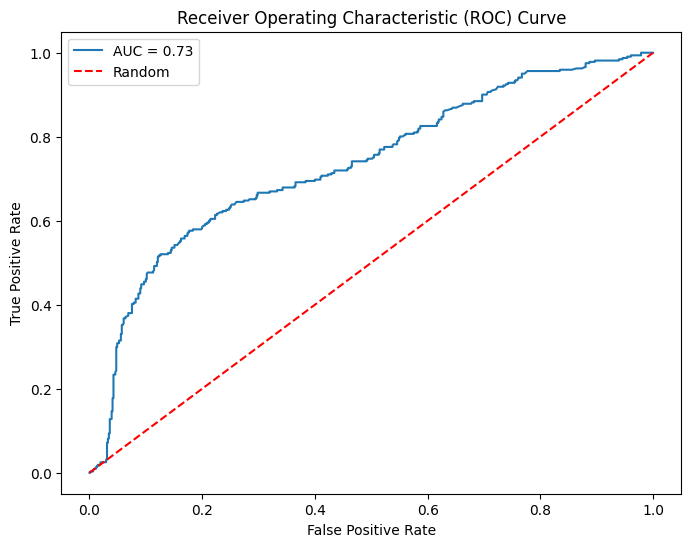

In [8]:

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for positive class

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)  # F2 score (you can adjust beta as needed)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Display metrics
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F2 Score: {f2}")
print(f"AUC: {roc_auc}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Confusion Matrix:
[[570  40]
 [133 188]]
Accuracy: 0.8141783029001074
Precision: 0.8245614035087719
F2 Score: 0.6216931216931216
AUC: 0.8218272815484398


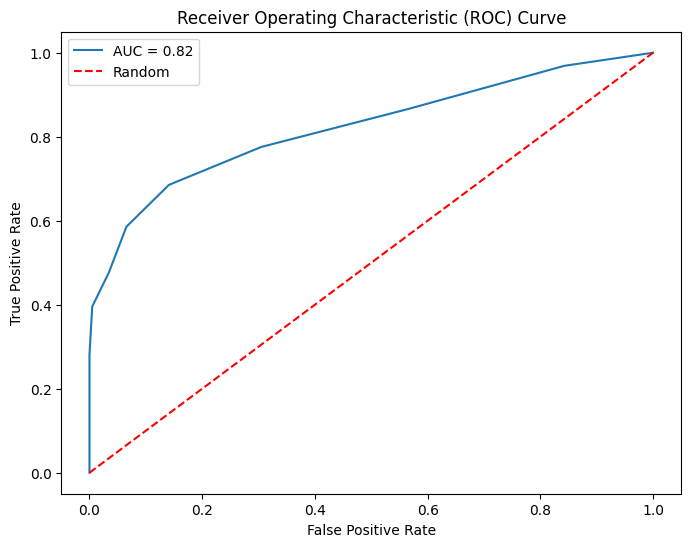

In [12]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors= 9)

KNN.fit(X_train,y_train)

y_pred = KNN.predict(X_test)


y_pred_prob = KNN.predict_proba(X_test)[:, 1]  # Predicted probabilities for positive class

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)  # F2 score (you can adjust beta as needed)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Display metrics
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F2 Score: {f2}")
print(f"AUC: {roc_auc}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()